In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

2024-11-26 00:11:12.768910: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 00:11:12.771558: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 00:11:12.780228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 00:11:12.795595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 00:11:12.800041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 00:11:12.811087: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Load MNIST dataset
objects = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

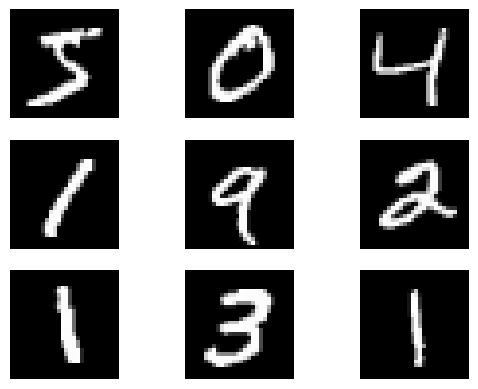

In [3]:
# Display a few training images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(training_images[i], cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
plt.show()

In [4]:
# Normalize the pixel values and reshape images for the model
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
training_images = training_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [5]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(training_images, training_labels, epochs=5, validation_split=0.2)

/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2024-11-26 00:11:25.287501: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7846 - loss: 0.6511

2024-11-26 00:11:47.789313: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7850 - loss: 0.6502 - val_accuracy: 0.9722 - val_loss: 0.0884
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9677 - loss: 0.1117 - val_accuracy: 0.9780 - val_loss: 0.0744
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9792 - loss: 0.0727 - val_accuracy: 0.9807 - val_loss: 0.0653
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9817 - loss: 0.0608 - val_accuracy: 0.9832 - val_loss: 0.0626
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9861 - loss: 0.0463 - val_accuracy: 0.9866 - val_loss: 0.0487


In [6]:
# Save the model
model.save("my_model.h5")

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0610
Test accuracy: 0.9850999712944031


In [8]:
# Make predictions on test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


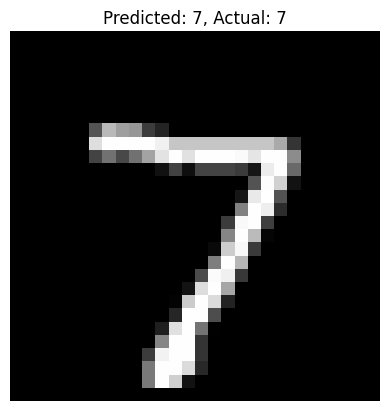

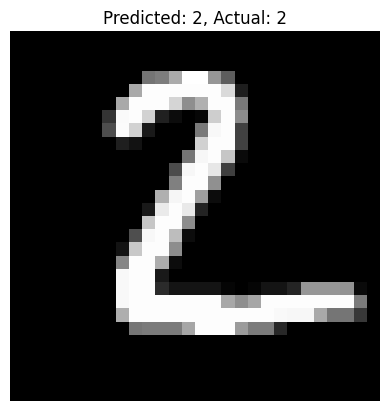

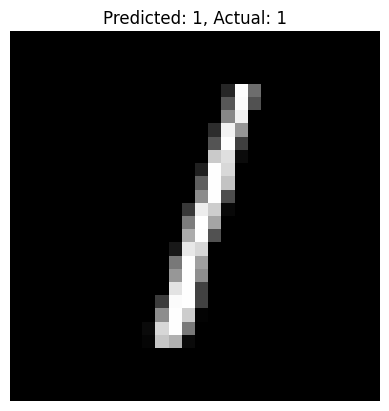

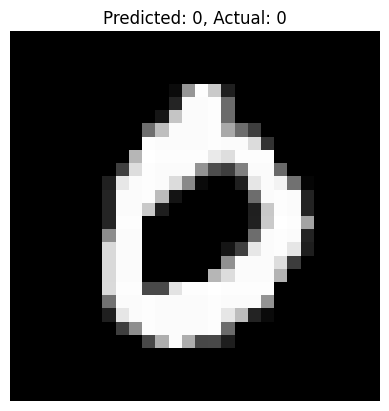

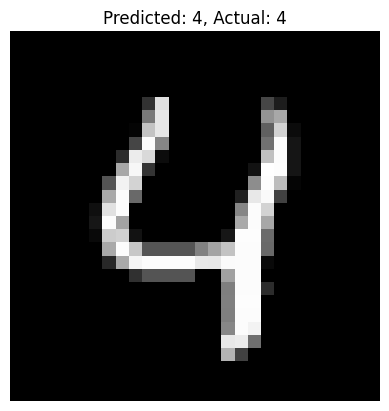

In [9]:
# Check a few predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {test_labels[i]}')
    plt.axis('off')  # Hide axes
    plt.show()

In [ ]:
 #plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {test_labels[i]}')
    plt.axis('off')  # Hide axes
    plt.show()

In [10]:
# Load the saved model for predictions
loaded_model = tf.keras.models.load_model("my_model.h5")

In [11]:
# Function to process and predict from an image
def predict_image(img):
    if img is None:
        return "No image provided or invalid input.", None

    try:
        # Ensure the image is in grayscale
        img = img.convert("L")

        # Resize image to 28x28
        img_resized = img.resize((28, 28))

        # Convert image to NumPy array and normalize pixel values
        img_array = np.array(img_resized).astype('float32') / 255.0

        # Reshape the image array for model input (1, 28, 28, 1)
        img_reshaped = img_array.reshape(1, 28, 28, 1)

        # Make prediction
        prediction = loaded_model.predict(img_reshaped)
        predicted_class = np.argmax(prediction)

        return str(predicted_class), img_resized  # Return predicted class and resized image
    except Exception as e:
        return f"Error: {e}", None


In [12]:
# Gradio interface
iface = gr.Interface(
    fn=predict_image,  # Function for prediction
    inputs=gr.Image(type="pil", label="Upload an image for prediction"),  # Upload an image
    outputs=[gr.Label(label="Predicted Class"), gr.Image(type="pil", label="Resized Image")],  # Display prediction and image
    live=True
)

# Launch the Gradio interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


In [13]:
iface = gr.Interface(
    fn=predict_image,  # Function for prediction
    inputs=gr.Image(type="pil", label="Upload an image for prediction"),  # Upload an image
    outputs=[gr.Label(label="Predicted Class"), gr.Image(type="pil", label="Resized Image")],  # Display prediction and image
    live=True,
    title="Image Classification and Resizing"  # Add a title/heading
    
)

# Launch the Gradio interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [14]:
iface = gr.Interface(
    fn=predict_image,  # Function for prediction
    inputs=gr.Image(type="pil", label="Upload an image for prediction"),  # Upload an image
    outputs=[gr.Label(label="Predicted Class"), gr.Image(type="pil", label="Resized Image")],  # Display prediction and image
    live=True,
    description="<h1 style='color: blue;'>Handwritten Digit Recognition(Sudipta Ghosh-----IIT Kharagpur)</h1>",  # Add custom-styled heading
)

# Launch the Gradio interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [23]:
import gradio as gr

def predict_image(image):
    # Replace this function with your model's prediction logic
    # For demonstration, returning dummy values
    return "Predicted Class: 5", image.resize((28, 28))

with gr.Blocks() as demo:
    # Navbar
    gr.Markdown(
        """
        <nav style="background-color: #4CAF50; color: white; padding: 15px; text-align: center; font-size: 20px; font-weight: bold;">
            Hand Written Digit Recognition
        </nav>
        """
    )
    
    # Main Interface
    with gr.Row():
        with gr.Column():
            image_input = gr.Image(type="pil", label="Upload an image for prediction")
        with gr.Column():
            result_label = gr.Label(label="Predicted Class")
            resized_image_output = gr.Image(type="pil", label="Resized Image")
    
    # Footer
    gr.Markdown(
        """
        <footer style="background-color: #333; color: white; padding: 10px; text-align: center; margin-top: 20px; font-size: 14px;">
            Sudipta Ghosh, Department of Mathematics, 23MA60R03
        </footer>
        """
    )

    # Link inputs and outputs to the function
    image_input.change(fn=predict_image, inputs=image_input, outputs=[result_label, resized_image_output])

# Launch the Gradio interface
demo.launch()


* Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/home/hp/.local/lib/python3.10/site-packages/gradio/queueing.py", line 622, in process_events
    response = await route_utils.call_process_api(
  File "/home/hp/.local/lib/python3.10/site-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/home/hp/.local/lib/python3.10/site-packages/gradio/blocks.py", line 2024, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "/home/hp/.local/lib/python3.10/site-packages/gradio/blocks.py", line 1830, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "/home/hp/.local/lib/python3.10/site-packages/gradio/components/label.py", line 142, in postprocess
    confidences=[
  File "/home/hp/.local/lib/python3.10/site-packages/gradio/components/label.py", line 143, in <listcomp>
    LabelConfidence(label=pred[0], confidence=pred[1])
  File "/home/hp/.local/lib/pyth

In [24]:
import gradio as gr

def predict_image(img):
    if img is None:
        return "No image provided or invalid input.", None

    try:
        # Ensure the image is in grayscale
        img = img.convert("L")

        # Resize image to 28x28
        img_resized = img.resize((28, 28))

        # Convert image to NumPy array and normalize pixel values
        img_array = np.array(img_resized).astype('float32') / 255.0

        # Reshape the image array for model input (1, 28, 28, 1)
        img_reshaped = img_array.reshape(1, 28, 28, 1)

        # Make prediction
        prediction = loaded_model.predict(img_reshaped)
        predicted_class = np.argmax(prediction)

        return str(predicted_class), img_resized  # Return predicted class and resized image
    except Exception as e:
        return f"Error: {e}", None


with gr.Blocks() as demo:
    # Navbar
    gr.Markdown(
        """
        <nav style="background-color: #4CAF50; color: white; padding: 15px; text-align: center; font-size: 20px; font-weight: bold;">
            Hand Written Digit Recognition
        </nav>
        """
    )
    
    # Main Interface
    with gr.Row():
        with gr.Column():
            image_input = gr.Image(type="pil", label="Upload an image for prediction")
        with gr.Column():
            result_label = gr.Label(label="Predicted Class")
            resized_image_output = gr.Image(type="pil", label="Resized Image")
    
    # Footer
    gr.Markdown(
        """
        <footer style="background-color: #333; color: white; padding: 10px; text-align: center; margin-top: 20px; font-size: 14px;">
            Sudipta Ghosh, Department of Mathematics, 23MA60R03
        </footer>
        """
    )

    # Link inputs and outputs to the function
    image_input.change(fn=predict_image, inputs=image_input, outputs=[result_label, resized_image_output])

# Launch the Gradio interface
demo.launch()

* Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
